## Feature Engineering
Creating new features and other data transformation to prepare features for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data is available at the [UCI ML Website](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)

In [2]:
# Importing the data file and printing shape

df = pd.read_csv('energydata_complete.csv', parse_dates=['date'])
df.shape

(19735, 29)

In [3]:
# Print basic information of the dataframe varibles

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [4]:
# Drop random variables as they are not used for prediction

df.drop(['rv1', 'rv2'], axis=1, inplace=True)

### Creating Hour, Weekday and Month from Date
Use the date column to extract hour of day, day of the week and month to use any hourly, weekly and monthly patterns.

In [5]:
# Extracting hour of day from date

df['hour'] = df.date.dt.hour

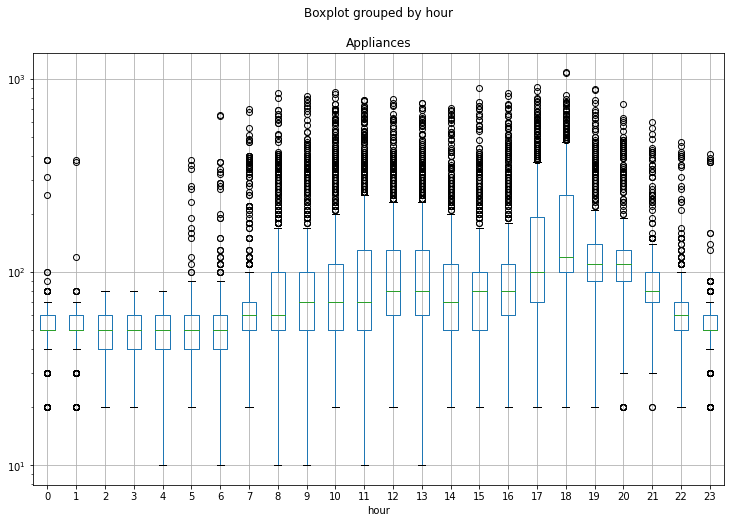

In [6]:
# Plotting appliance energy (log) use distribution by hour

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='Appliances', by='hour')
ax.set_yscale('log')

<AxesSubplot:title={'center':'lights'}, xlabel='hour'>

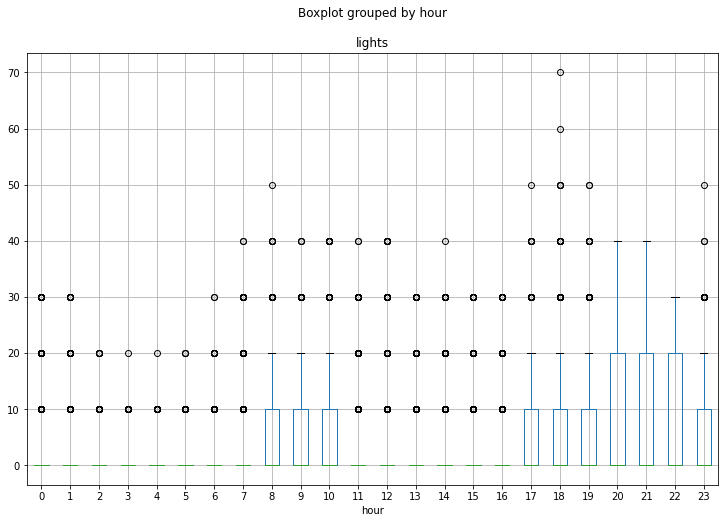

In [7]:
# Plotting light energy use distribution by hour

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='lights', by='hour')

In [8]:
# Extracting Day of Week from date

df['weekday'] = df.date.dt.dayofweek

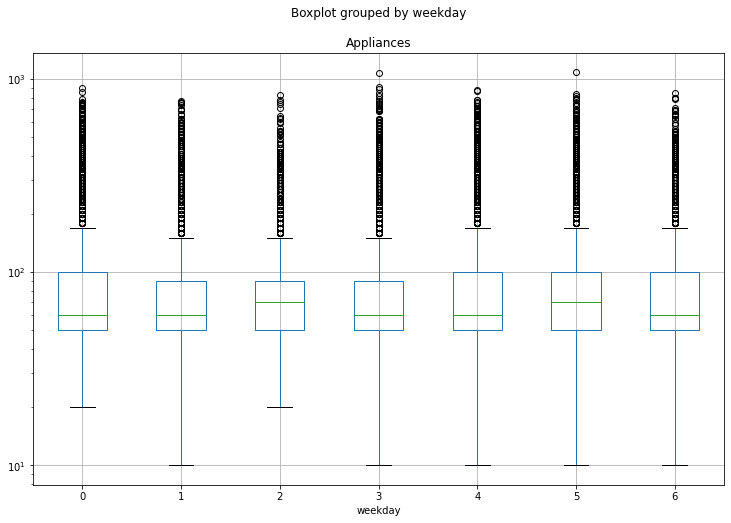

In [9]:
# Plotting appliance energy (log) use distribution by day of week

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='Appliances', by='weekday')
ax.set_yscale('log')

In [10]:
# Extracting month from date

df['month'] = df.date.dt.month

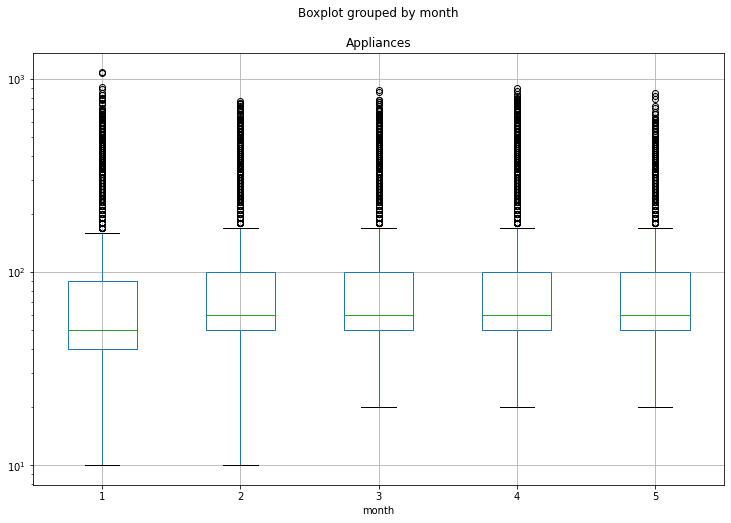

In [11]:
# Plotting appliance energy (log) use distribution by month

fig, ax = plt.subplots(figsize = (12,8))
df.boxplot(ax = ax, column='Appliances', by='month')
ax.set_yscale('log')

### Observations
1. Appliance energy use has a hourly pattern, with low use during late night and early morning. Peak use was around 5-6 PM.
2. Light energy use follows a predictable hourly pattern of most use during 8-10 AM and 5-11 PM.
3. Energy use by appliances by day of week and by month does not have any specific pattern

### Transforming existing features
1. Create Log of energy use by appliances
2. Create average of inside and outside temperatures that are highly correlated with each other
3. Create difference between inside and outside temperatures
4. Create average of inside and outside humidity that are highly correlated with each other
5. Create difference between inside and outside humidity
6. Create one hot encoding (using dummies) for categorical data of hour, weekday, and month 
7. Split the data into training and testing data sets
8. Scale the data using Min-Max scaler because it preserves the one-hot encoding
9. Transforming the Train and Test data using the scaler
10. Making the y values 1 dimentional numpy arrays to be used in models

In [12]:
# Calculating log of appliance energy use column

df['log_energy'] = np.log(df['Appliances'])

In [13]:
# Calculating average of inside Temperature and Humidity

Temp_in = ['T1','T3','T4','T5','T7','T8','T9']
Hum_in = ['RH_1','RH_3','RH_4','RH_7','RH_8','RH_9']

df['Temp_in'] = np.nanmean(df[Temp_in], axis=1)
df['Hum_in'] = np.nanmean(df[Hum_in], axis=1)

In [14]:
# Calculating difference between inside and outside temperature and humidity

df['Temp_diff'] = np.abs(df['T_out'] - df['Temp_in'])
df['Hum_diff'] = np.abs(df['RH_out'] - df['Hum_in'])

In [15]:
# Selecting X and Y columns before creating dummies

X_cols = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
          'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'hour',
          'Temp_in', 'Hum_in', 'Temp_diff', 'Hum_diff', 'weekday', 'month']
y_col = ['log_energy']

X = df[X_cols]
y = df[y_col]

In [16]:
# Creating one-hot encoding for hour, dayofweek and month using dummies. 

X = pd.concat([X, pd.get_dummies(df.hour, prefix='h')], axis=1)
X = pd.concat([X, pd.get_dummies(df.weekday, prefix='w')], axis=1)
X = pd.concat([X, pd.get_dummies(df.month, prefix='m')], axis=1)

In [17]:
# Dropping hour, weekday and month columns after creating dummies

X = X.drop(['hour', 'weekday', 'month'], axis=1)

In [18]:
# Creating Training and Test data split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
# Creating the Min-Max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [20]:
# Transforming Train and Test features using min-max scaler

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Making y values numpy 1-dimentional arrays

y_train = y_train['log_energy'].ravel()
y_test = y_test['log_energy'].ravel()

In [22]:
# Inspecting shape of train and test data

print('Shape of Training Data Features:', X_train.shape)
print('Shape of Training Data Lables:', y_train.shape)
print('Shape of Testing Data Features:', X_test.shape)
print('Shape of Testing Data Lables:', y_test.shape)

Shape of Training Data Features: (13814, 64)
Shape of Training Data Lables: (13814,)
Shape of Testing Data Features: (5921, 64)
Shape of Testing Data Lables: (5921,)
